In [1]:

!pip install --upgrade pip
!pip install numpy==1.26.4 prophet==1.1.5 cmdstanpy==1.2.2 fastapi nest_asyncio "uvicorn[standard]" gradio requests matplotlib pandas pillow --quiet
!pip install numpy==1.26.4 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have num

In [1]:
import numpy as np
if not hasattr(np, "float_"):
    np.float_ = np.float64
import pandas as pd
import matplotlib.pyplot as plt
import io
from PIL import Image
from prophet import Prophet
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
import uvicorn
from threading import Thread
import gradio as gr
import requests


In [4]:
# Load the Airline Passengers dataset (or replace with your own CSV)
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Rename columns for Prophet
df.columns = ['ds', 'y']

# Shift data timeline to start from 2015
start_year = 2015
df['ds'] = pd.date_range(start=f'{start_year}-01-01', periods=len(df), freq='M')

print(df.head())


          ds    y
0 2015-01-31  112
1 2015-02-28  118
2 2015-03-31  132
3 2015-04-30  129
4 2015-05-31  121


/tmp/ipython-input-107801370.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start=f'{start_year}-01-01', periods=len(df), freq='M')


In [6]:
model = Prophet()
model.fit(df)

# Forecast 36 months (3 years) ahead
future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)

# Separating historical and forecasted data
past_data = forecast[forecast['ds'] < '2025-01-01']
future_data = forecast[forecast['ds'] >= '2025-01-01']

print(" Model trained and forecast generated.")



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ewrbjh9/wsnwzkur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ewrbjh9/0surgyd7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16252', 'data', 'file=/tmp/tmp3ewrbjh9/wsnwzkur.json', 'init=/tmp/tmp3ewrbjh9/0surgyd7.json', 'output', 'file=/tmp/tmp3ewrbjh9/prophet_modelcwdlgxtl/prophet_model-20251103063043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:30:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:30:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Model trained and forecast generated.


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [7]:
# Creating Sample Historical Data (starting from 2020)
dates = pd.date_range(start="2020-01-01", periods=60, freq="M")
values = np.random.randint(200, 500, len(dates))
df = pd.DataFrame({"ds": dates, "y": values})

# Display sample data
df.tail()


/tmp/ipython-input-929903409.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2020-01-01", periods=60, freq="M")


,ds,y
55,2024-08-31,470
56,2024-09-30,487
57,2024-10-31,413
58,2024-11-30,250
59,2024-12-31,372


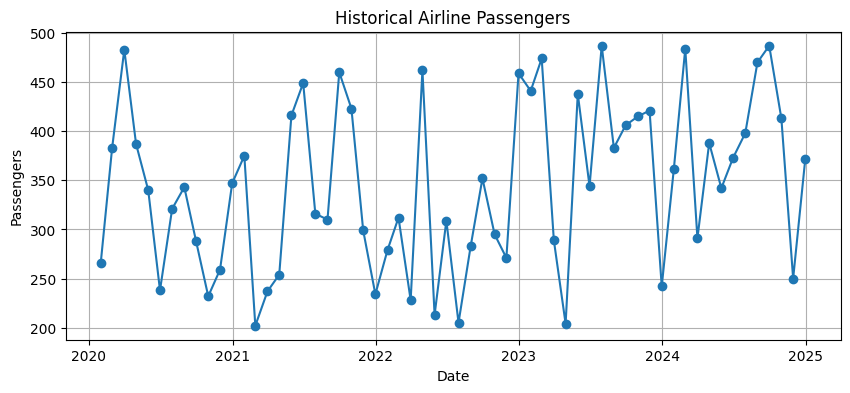

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df['ds'], df['y'], marker='o')
plt.title("Historical Airline Passengers")
plt.xlabel("Date"); plt.ylabel("Passengers")
plt.grid(True)
plt.show()


In [9]:
model = Prophet()
model.fit(df)
print("Prophet model trained.")
model = Prophet()
model.fit(df)

# Forecast 36 months (3 years) ahead
future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)

# Separate historical and forecasted data
past_data = forecast[forecast['ds'] < '2025-01-01']
future_data = forecast[forecast['ds'] >= '2025-01-01']

print(" Model trained and forecast generated.")



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ewrbjh9/u6yyasjl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3ewrbjh9/svb5re39.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21706', 'data', 'file=/tmp/tmp3ewrbjh9/u6yyasjl.json', 'init=/tmp/tmp3ewrbjh9/svb5re39.json', 'output', 'file=/tmp/tmp3ewrbjh9/prophet_modelo9piwm1e/prophet_model-20251103063057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:30:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

Prophet model trained.


06:30:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Model trained and forecast generated.


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [11]:
# Forecast helpers used by both API and UI

def forecast_future_from_last(n_months:int):
    """Return a DataFrame with next n_months forecast (ds,yhat,yhat_lower,yhat_upper)."""
    future = model.make_future_dataframe(periods=n_months, freq='M')
    forecast = model.predict(future)
    return forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(n_months).reset_index(drop=True)

def forecast_up_to_date(target_date):
    """
    Forecast up to a specific target_date (Timestamp).
    Returns full forecast up to that target date; if target is before last historical date, returns empty.
    """
    last_hist = df['ds'].max()
    if pd.to_datetime(target_date) <= last_hist:
        return pd.DataFrame()
    # periods = months difference
    ly, lm = last_hist.year, last_hist.month
    ty, tm = pd.Timestamp(target_date).year, pd.Timestamp(target_date).month
    n_months = (ty - ly) * 12 + (tm - lm)
    return forecast_future_from_last(n_months)

# Plotting functions that return PIL Image
def plot_historical_bytes():
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(df['ds'], df['y'], marker='o', color='blue', label='Historical')
    ax.set_title("Historical Passenger Trend")
    ax.set_xlabel("Date"); ax.set_ylabel("Passengers")
    ax.grid(True); ax.legend()
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    return buf

def plot_forecast_bytes(n_months:int):
    forecast = model.predict(model.make_future_dataframe(periods=n_months, freq='M'))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(df['ds'], df['y'], label='Historical', color='blue')
    ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    future_part = forecast.tail(n_months)
    ax.fill_between(future_part['ds'], future_part['yhat_lower'], future_part['yhat_upper'], color='orange', alpha=0.2)
    ax.set_title(f"Forecast (next {n_months} month(s))")
    ax.set_xlabel("Date"); ax.set_ylabel("Passengers")
    ax.grid(True); ax.legend()
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    return buf

def plot_forecast_until_date_bytes(target_date):
    # compute months to target (like forecast_up_to_date) and plot up to that month
    last_hist = df['ds'].max()
    ty = pd.Timestamp(target_date).year
    tm = pd.Timestamp(target_date).month
    ly, lm = last_hist.year, last_hist.month
    n_months = (ty - ly) * 12 + (tm - lm)
    if n_months <= 0:
        #  return historical plot
        return plot_historical_bytes()
    forecast = model.predict(model.make_future_dataframe(periods=n_months, freq='M'))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(df['ds'], df['y'], label='Historical', color='blue')
    ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    future_part = forecast.tail(n_months)
    ax.fill_between(future_part['ds'], future_part['yhat_lower'], future_part['yhat_upper'], color='orange', alpha=0.2)
    ax.set_title(f"Forecast up to {pd.Timestamp(target_date).strftime('%Y-%m')}")
    ax.set_xlabel("Date"); ax.set_ylabel("Passengers")
    ax.grid(True); ax.legend()
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)
    return buf


In [12]:
# FastAPI app: /trend and /forecast endpoints
app = FastAPI(title="Time Series Forecast API")

class ForecastRequest(BaseModel):
    n_months: int

@app.get("/trend")
def get_trend():
    # return last 24 historical months for context
    recent = df.tail(24)
    return recent.to_dict(orient='records')

@app.post("/forecast")
def post_forecast(req: ForecastRequest):
    n = int(req.n_months)
    forecast_df = forecast_future_from_last(n)
    # ensure ds are iso strings
    forecast_df['ds'] = forecast_df['ds'].dt.strftime('%Y-%m-%d')
    return forecast_df.to_dict(orient='records')

# endpoint to get forecast for an exact target month (YYYY-MM)
class MonthRequest(BaseModel):
    year: int
    month: int

@app.post("/forecast_by_month")
def forecast_by_month(req: MonthRequest):
    y = int(req.year)
    m = int(req.month)
    # build target_date as last day of that month (we only need year-month)
    target_date = pd.Timestamp(year=y, month=m, day=1)
    forecast_df = forecast_up_to_date(target_date)
    # select only the last row (the target month)
    if forecast_df.empty:
        return {"error": "target is within historical range; no future forecast"}
    row = forecast_df.tail(1).copy()
    row['ds'] = row['ds'].dt.strftime('%Y-%m-%d')
    return row.to_dict(orient='records')


In [13]:
# Start FastAPI in background thread
nest_asyncio.apply()

def run_api():
    uvicorn.run(app, host="127.0.0.1", port=8000)

api_thread = Thread(target=run_api, daemon=True)
api_thread.start()

print("FastAPI started at http://127.0.0.1:8000")


FastAPI started at http://127.0.0.1:8000


In [15]:
API_BASE = "http://127.0.0.1:8000"

# UI functions call the API and return (table, image)
def ui_show_trend():
    r = requests.get(f"{API_BASE}/trend")
    recs = r.json()
    df_trend = pd.DataFrame(recs)
    img_buf = plot_historical_bytes()
    return df_trend, Image.open(img_buf)

def ui_forecast_next_month():
    r = requests.post(f"{API_BASE}/forecast", json={"n_months": 1})
    recs = r.json()
    df_fore = pd.DataFrame(recs)
    img_buf = plot_forecast_bytes(1)
    return df_fore, Image.open(img_buf)

def ui_forecast_n_months(n_months):
    n = int(n_months)
    r = requests.post(f"{API_BASE}/forecast", json={"n_months": n})
    recs = r.json()
    df_fore = pd.DataFrame(recs)
    img_buf = plot_forecast_bytes(n)
    return df_fore, Image.open(img_buf)

def ui_forecast_by_month(year, month):
    # validate inputs
    year = int(year); month = int(month)
    r = requests.post(f"{API_BASE}/forecast_by_month", json={"year": year, "month": month})
    recs = r.json()
    if isinstance(recs, dict) and recs.get("error"):
        # target within historical range
        # return historical table + historical image
        img_buf = plot_historical_bytes()
        return pd.DataFrame(), Image.open(img_buf), f"Error: {recs['error']}"
    df_fore = pd.DataFrame(recs)
    # plot up to that date
    target_date = pd.Timestamp(year=year, month=month, day=1)
    img_buf = plot_forecast_until_date_bytes(target_date)
    # also return a small message text showing the interval
    msg = f"Forecast for {year}-{month:02d}: yhat={df_fore.loc[0,'yhat']:.2f}, lower={df_fore.loc[0,'yhat_lower']:.2f}, upper={df_fore.loc[0,'yhat_upper']:.2f}"
    return df_fore, Image.open(img_buf), msg

# Build the Gradio Blocks UI
with gr.Blocks() as demo:
    gr.Markdown(" Airline Passenger Forecast Dashboard")
    gr.Markdown("Buttons call the FastAPI backend and display historical & forecast results.")
    with gr.Row():
        with gr.Column():
            gr.Markdown(" Historical (past months)")
            btn_trend = gr.Button(" Show Current Trend")
            trend_table = gr.Dataframe(label="Historical (last 24 months)")
            trend_img = gr.Image(label="Historical Plot")
            btn_trend.click(fn=ui_show_trend, outputs=[trend_table, trend_img])
        with gr.Column():
            gr.Markdown("Forecast (quick options)")
            btn_next = gr.Button(" Forecast: Next Month (1)")
            next_table = gr.Dataframe(label="Next Month Forecast")
            next_img = gr.Image(label="Forecast Plot (1 month)")
            btn_next.click(fn=ui_forecast_next_month, outputs=[next_table, next_img])

            gr.Markdown(" Forecast N months")
            n_months = gr.Number(value=3, label="Enter N months")
            btn_n = gr.Button(" Forecast N Months")
            n_table = gr.Dataframe(label="Forecast Table (N months)")
            n_img = gr.Image(label="Forecast Plot (N months)")
            btn_n.click(fn=ui_forecast_n_months, inputs=n_months, outputs=[n_table, n_img])

            gr.Markdown(" Forecast for a specific month (select month & year)")
            # month dropdown and year input
            month_dropdown = gr.Dropdown(choices=[str(i) for i in range(1,13)], label="Month (1-12)", value="1")
            year_input = gr.Number(value=df['ds'].max().year + 1, label="Year (e.g., 2025)")
            btn_month = gr.Button(" Forecast for Selected Month")
            month_table = gr.Dataframe(label="Forecast for Selected Month")
            month_img = gr.Image(label="Forecast Plot up to Selected Month")
            message_box = gr.Textbox(label="Info / Message")
            btn_month.click(fn=ui_forecast_by_month, inputs=[year_input, month_dropdown], outputs=[month_table, month_img, message_box])

    gr.Markdown("**Notes:** `yhat` = predicted value, `yhat_lower`/`yhat_upper` = confidence interval.")

# Launch Gradio (launch in colab)
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4198a0f404b130ad4d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
